In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Klastrowanie hierarchiczne

Porównanie różnych podejśc do łączenia grup.

* https://en.wikipedia.org/wiki/Hierarchical_clustering
* http://research.med.helsinki.fi/corefacilities/proteinchem/hierarchical_clustering_basics.pdf
* https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf

In [2]:
rnd.seed(123)
X = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
y = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

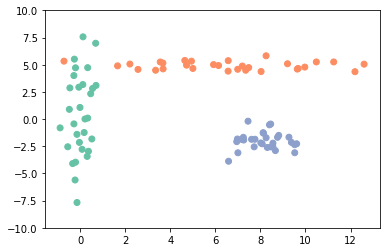

90

In [3]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.ylim(-10,10)
plt.show()

data_num = X.shape[0]
data_num

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

#  method='single'



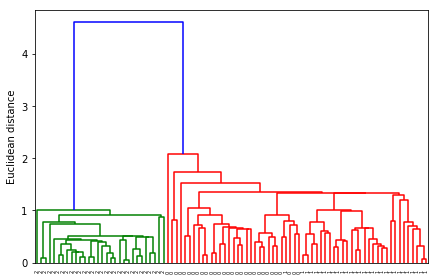

In [5]:
df = pd.DataFrame(X, index=y)
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 

row_dendr = dendrogram(row_clusters, 
                       labels=y)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()




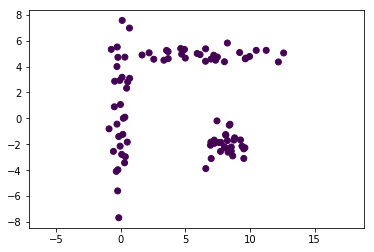

1   0.0


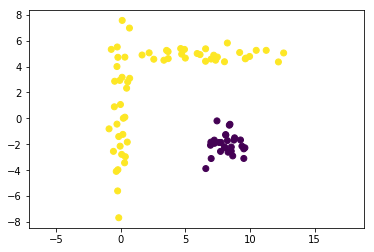

2   0.5658536585365854


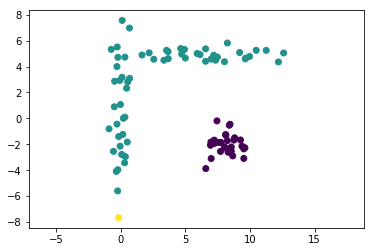

3   0.5619939672963962


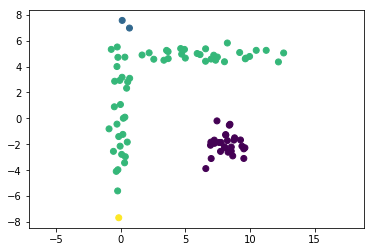

4   0.5563339790216426


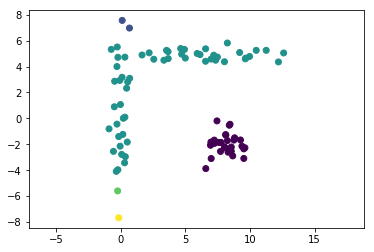

5   0.5539991319101921


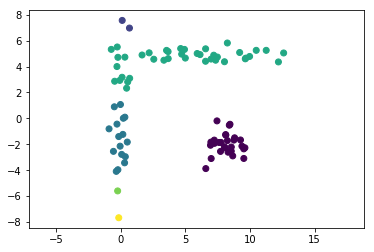

6   0.6785943221990213


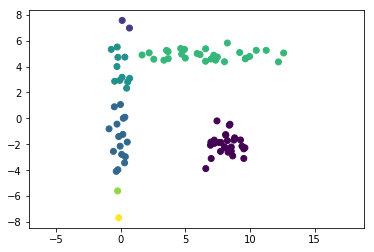

7   0.8143723928706864


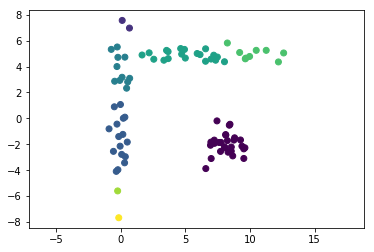

8   0.6943388790361175


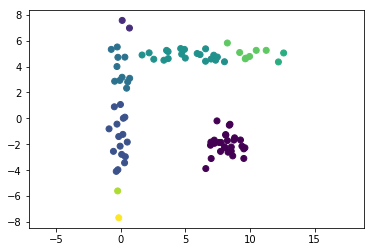

9   0.6846065876971298


In [8]:
%matplotlib inline

for i in range(1,10):
    part = fcluster(row_clusters, i, 'maxclust')
    plt.scatter(X[:, 0], X[:, 1], c = part)
    plt.axis("equal")
    plt.show()
    print(i, " ", metrics.adjusted_rand_score(y, part))
    


# complete 

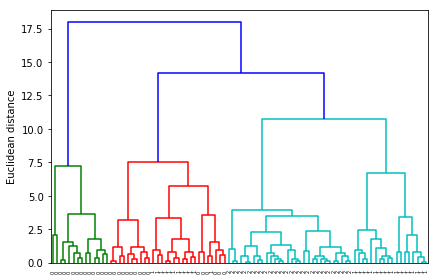

In [16]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)#,
#                        truncate_mode='lastp',  # show only the last p merged clusters
#                        p=12,  # show only the last p merged clusters
#                        show_leaf_counts=True,)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()




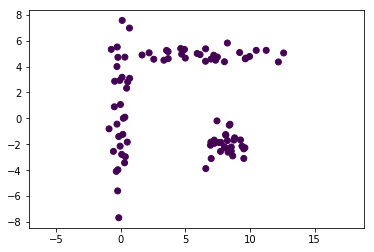

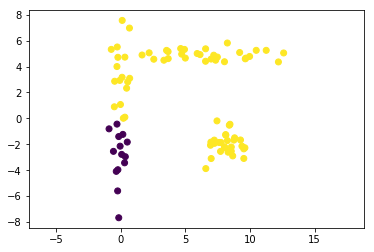

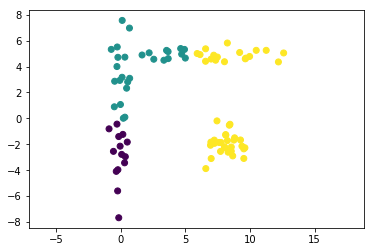

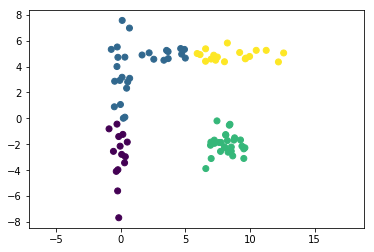

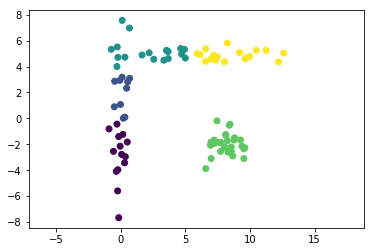

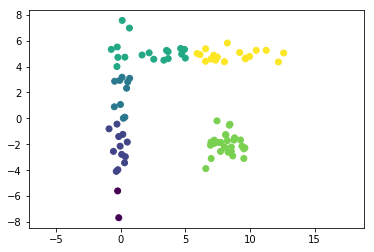

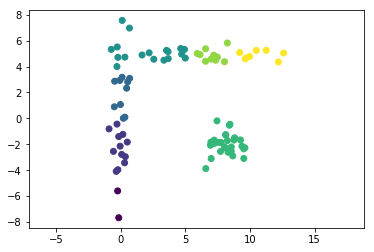

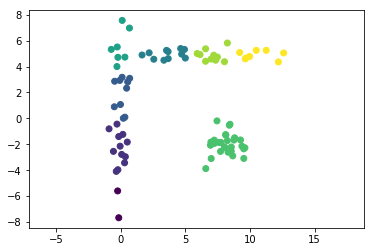

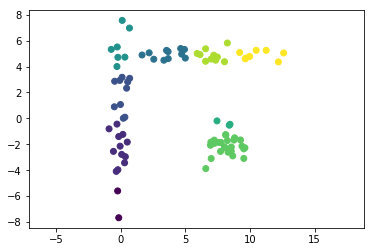

0.537918792989


In [17]:

for i in range(1,10):
    part = fcluster(row_clusters, i, 'maxclust')
    plt.scatter(X[:, 0], X[:, 1], c = part)
    plt.axis("equal")
    plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="average"

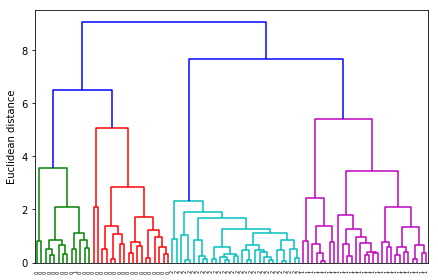

In [18]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()




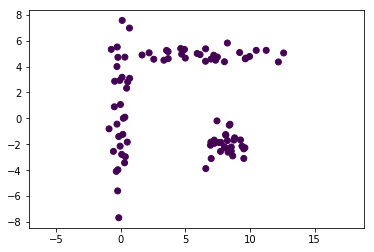

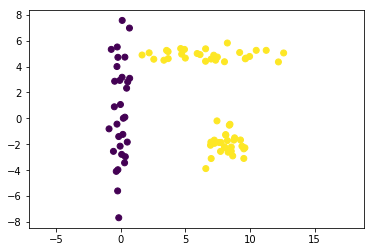

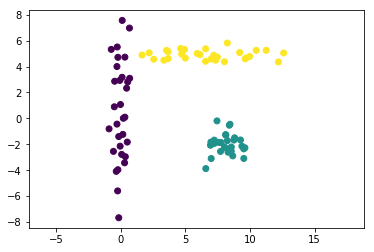

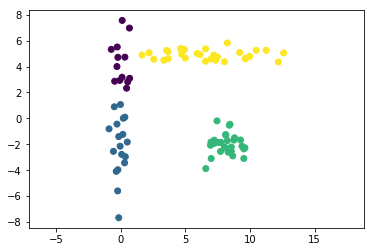

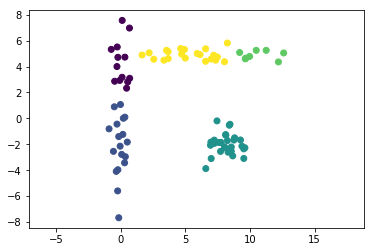

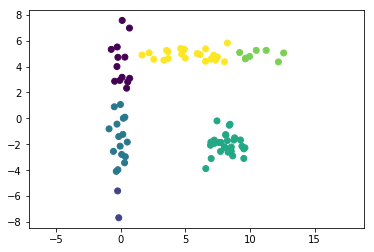

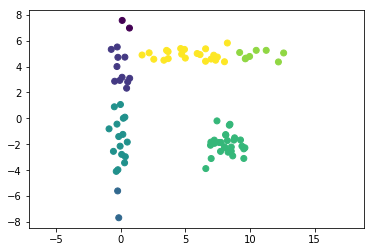

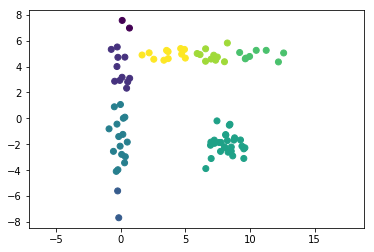

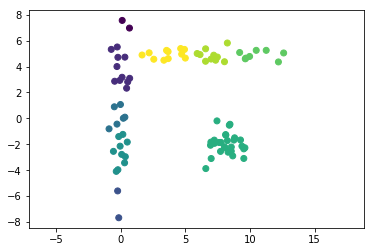

0.581672435781


In [19]:

for i in range(1,10):
    part = fcluster(row_clusters, i, 'maxclust')
    plt.scatter(X[:, 0], X[:, 1], c = part)
    plt.axis("equal")
    plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="ward"

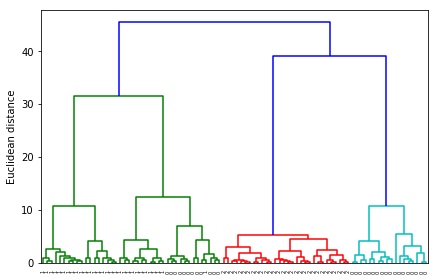

In [20]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()




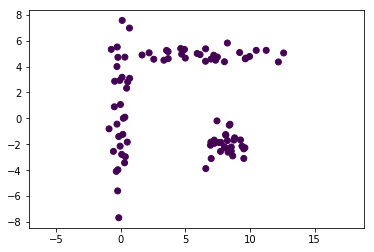

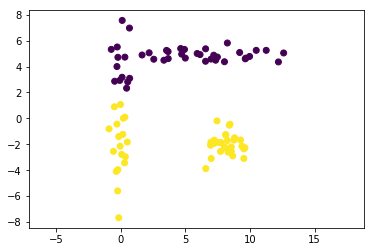

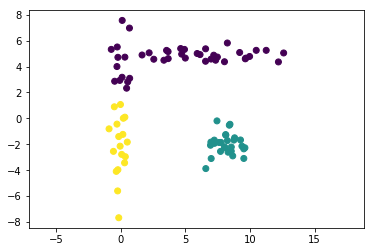

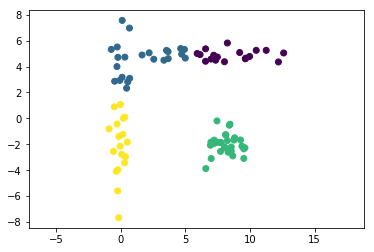

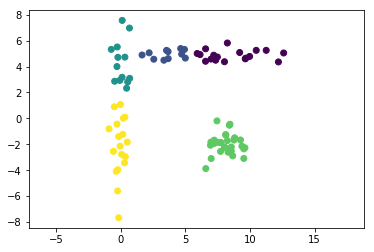

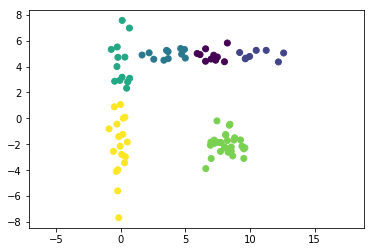

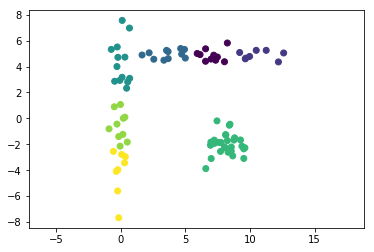

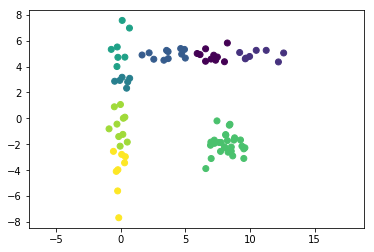

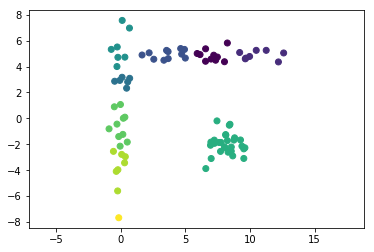

0.575694647558


In [21]:

for i in range(1,10):
    part = fcluster(row_clusters, i, 'maxclust')
    plt.scatter(X[:, 0], X[:, 1], c = part)
    plt.axis("equal")
    plt.show()

print(metrics.adjusted_rand_score(y, part))

# method = 'median' 

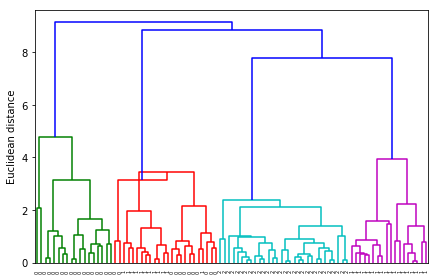

In [22]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='median') 
row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()




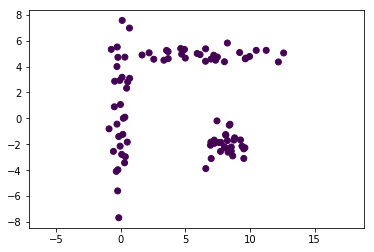

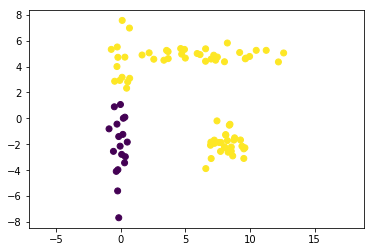

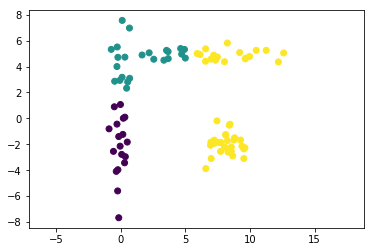

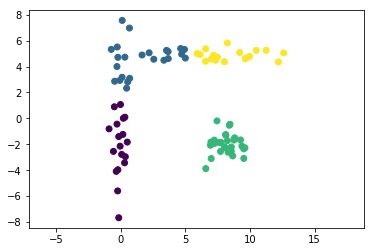

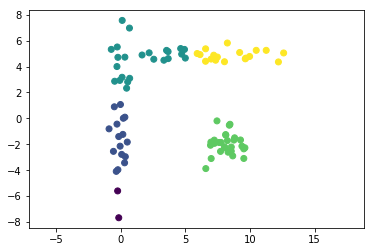

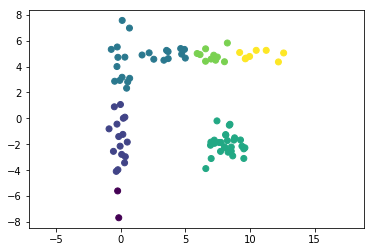

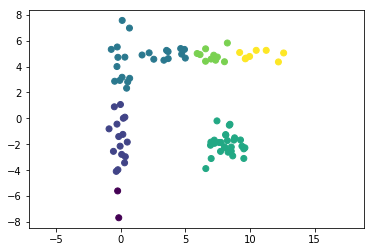

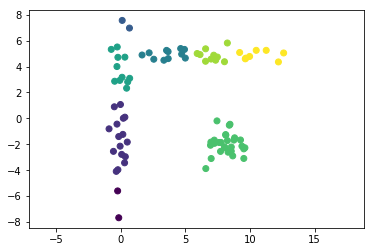

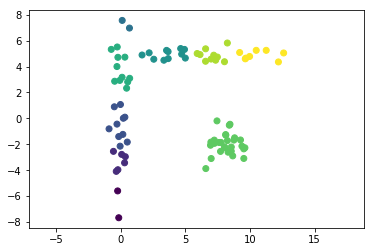

0.581672435781


In [23]:

for i in range(1,10):
    part = fcluster(row_clusters, i, 'maxclust')
    plt.scatter(X[:, 0], X[:, 1], c = part)
    plt.axis("equal")
    plt.show()

print(metrics.adjusted_rand_score(y, part))

ZADANIE: Porównać podobieństwo poszczególnych linkage functions mierząc rand index pomiędzy nimi dla ustalonej liczby klastrów np. trzech

In [25]:
cl_num = 3
methods = ["single", "complete", "average", "ward", "median"]

parts = []
    
for m in methods:
    row_clusters = linkage(pdist(df, metric='euclidean'), method=m) 
    part = fcluster(row_clusters, cl_num, 'maxclust')
    parts.append(part)



In [30]:
from sklearn.metrics.cluster import adjusted_rand_score

conf = np.zeros(shape = (len(parts), len(parts)))

for i,p in enumerate(parts):
    for j,r in enumerate(parts):
        ari = adjusted_rand_score(p,r)
        conf[i,j] = ari
        

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [31]:
conf

array([[ 1.        ,  0.18535442,  0.56149144,  0.64204639,  0.16290832],
       [ 0.18535442,  1.        ,  0.37522191,  0.4054225 ,  0.92051405],
       [ 0.56149144,  0.37522191,  1.        ,  0.66242801,  0.39649751],
       [ 0.64204639,  0.4054225 ,  0.66242801,  1.        ,  0.48280315],
       [ 0.16290832,  0.92051405,  0.39649751,  0.48280315,  1.        ]])

In [33]:
df = pd.DataFrame(conf, columns=methods, index=methods)
df

,single,complete,average,ward,median
single,1.000000,0.185354,0.561491,0.642046,0.162908
complete,0.185354,1.000000,0.375222,0.405422,0.920514
average,0.561491,0.375222,1.000000,0.662428,0.396498
ward,0.642046,0.405422,0.662428,1.000000,0.482803
median,0.162908,0.920514,0.396498,0.482803,1.000000


# Porównanie

Zobacz porównanie linkage functions na http://scikit-learn.org/dev/auto_examples/cluster/plot_linkage_comparison.html

# Różne odległości

In [35]:
import scipy.spatial.distance as dis

# euclidean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

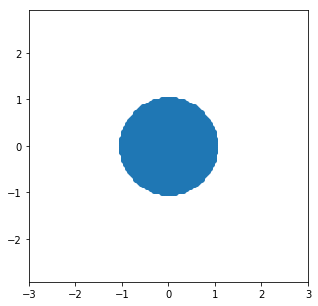

In [36]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.euclidean([0,0],[i,j]) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cityblock

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html#scipy.spatial.distance.cityblock

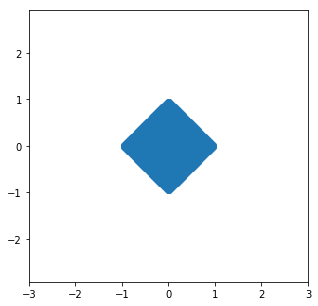

In [37]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.cityblock([0,0],[i,j]) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# mahalanobis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis

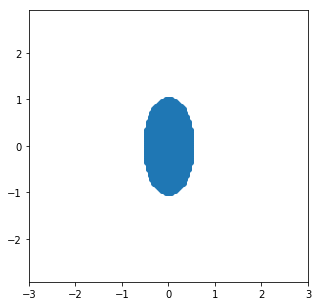

In [38]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], [[4,0],[0,1]] ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

[[ 0.875       0.21650635]
 [ 0.21650635  0.625     ]]


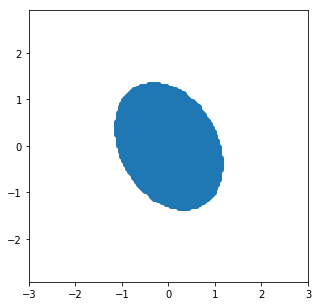

In [39]:
theta = np.pi/3
V = np.linalg.inv(
    np.dot(np.dot(np.transpose([[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]]) , [[2,0],[0,1]]),
           [[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]] 
))
print(V)

# http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], V ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()


# cosine

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

https://en.wikipedia.org/wiki/Cosine_similarity

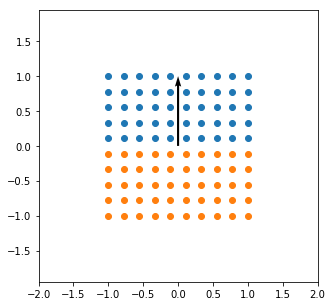

In [40]:
data = []
data1 = []
for i in np.linspace(-1., 1.0, num=10):
    for j in np.linspace(-1., 1.0, num=10):
        if( dis.cosine([0,1],[i,j]) < 1 ):
            data.append( [i,j] )
#         print(dis.cosine([0.1,0.1],[i,j]))
        else:
            data1.append( [i,j] )
#             print(1)
data = np.array(data)   
data1 = np.array(data1)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.scatter(data1[:,0], data1[:,1])
V = np.array([[0,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1)
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# Zad.

Zgadnij, która miara zadziała najlepiej

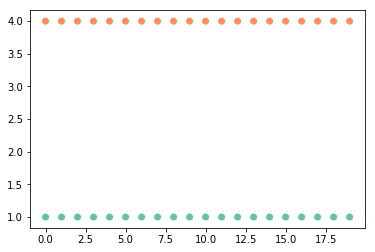

In [41]:
X= np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T
y = np.hstack((np.repeat(0,20),np.repeat(1,20)))
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

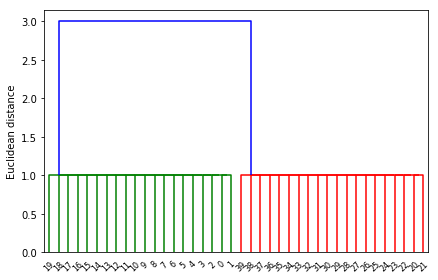

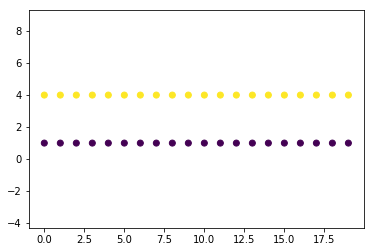

1.0


In [42]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

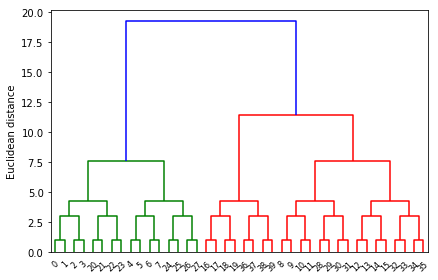

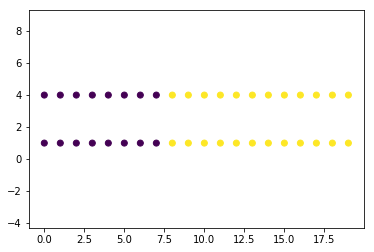

-0.0252365930599


In [43]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [50]:
X = np.loadtxt("./data_cl/flame_data.txt")
y = np.loadtxt("./data_cl/flame_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(240, 2)
[0 1]


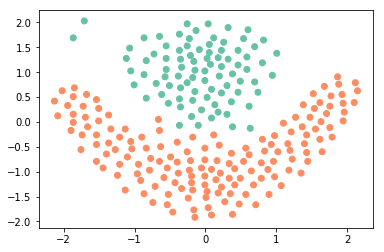

In [51]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

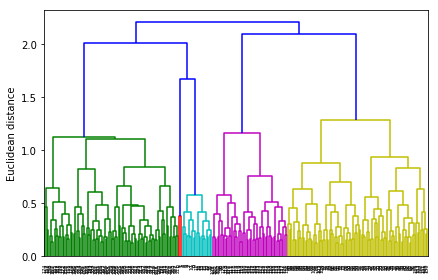

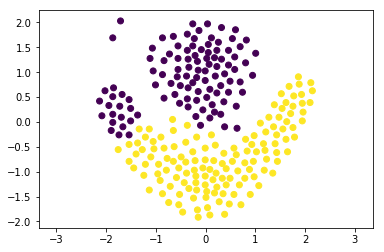

0.692912419519


In [52]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='mahalanobis'), method='average') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [53]:
X = np.loadtxt("./data_cl/pathbased_data.txt")
y = np.loadtxt("./data_cl/pathbased_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(300, 2)
[0 1 2]


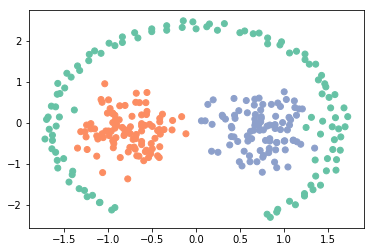

In [54]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

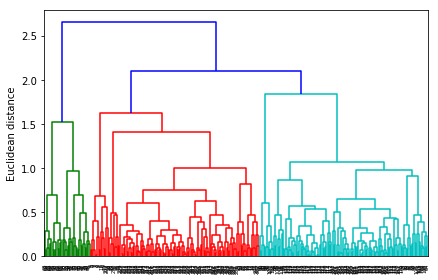

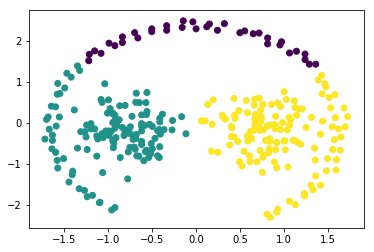

0.471744046101


In [57]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [58]:
X = np.loadtxt("./data_cl/jain_data.txt")
y = np.loadtxt("./data_cl/jain_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(373, 2)
[0 1]


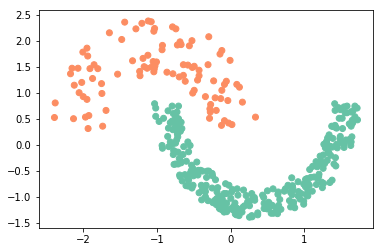

In [59]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

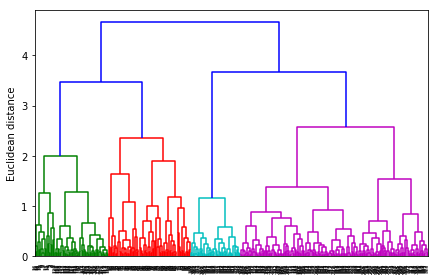

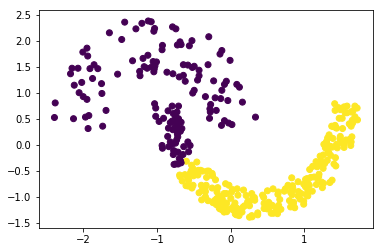

0.522227274179


In [60]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='mahalanobis'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 2, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [61]:
X = np.loadtxt("./data_cl/Compound_data.txt")
y = np.loadtxt("./data_cl/Compound_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(399, 2)
[0 1 2 3 4 5]


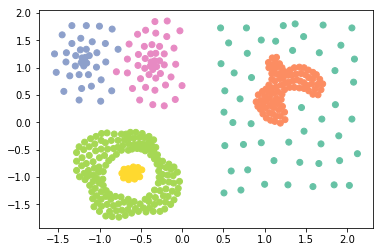

In [62]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

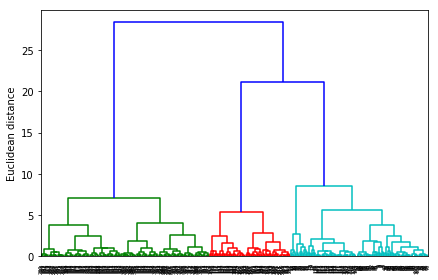

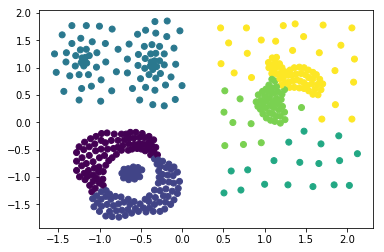

0.501062061962


In [63]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 6, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [64]:
X = np.loadtxt("./data_cl/spiral_data.txt")
y = np.loadtxt("./data_cl/spiral_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(312, 2)
[0 1 2]


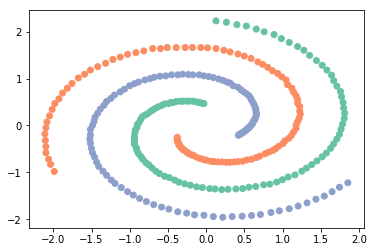

In [65]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

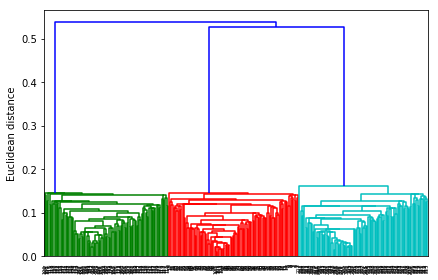

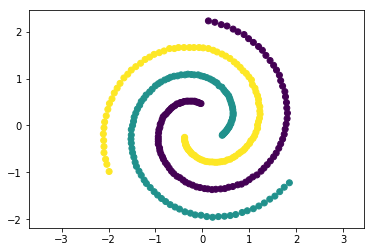

1.0


In [66]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))